## Test overview

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

import numpy as np
import os
import matplotlib.pyplot as plt

import plotly.express as px 
import plotly.graph_objects as go


Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 462 ('figure.figsize   : 5, 3   ## figure size in inches')
Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 463 ('figure.dpi       : 100        ## figure dots per inch')


In [2]:
df_runs = pd.read_csv('../data/raw/runs.csv', index_col=0)

In [3]:
df_runs.head()

,Körfallstyp,angle1,angle2,ascii_name,comment,date,facility,file_path_ascii,file_path_ascii_temp,file_path_hdf5,file_path_log,loading_condition_id,model_number,project_number,run_number,series_number,ship_name,ship_speed,test_number,test_type
22605,NaN,NaN,NaN,NaN,12.0 kn,2020-09-18,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,167.0,M5139-02-A,40199079.0,1.0,1.0,M5139-02-A,12.0,7.0,reference speed
22606,NaN,NaN,NaN,NaN,12.0 kn,2020-09-21,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,167.0,M5139-02-A,40199079.0,2.0,1.0,M5139-02-A,12.0,7.0,reference speed
22607,NaN,NaN,NaN,NaN,12.0 kn,2020-09-22,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,167.0,M5139-02-A,40199079.0,3.0,1.0,M5139-02-A,12.0,7.0,reference speed
22608,NaN,NaN,NaN,NaN,12.0 kn,2020-09-22,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,167.0,M5139-02-A,40199079.0,4.0,1.0,M5139-02-A,12.0,7.0,reference speed
22609,NaN,NaN,NaN,NaN,12.0 kn,2020-09-22,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,167.0,M5139-02-A,40199079.0,5.0,1.0,M5139-02-A,12.0,7.0,reference speed


In [4]:
df_runs['series_number'].unique()

array([ 1.,  5., 10.])

In [5]:
df_runs['test_type'].unique()

array(['reference speed', 'rodergrundvinkel', 'zigzag', 'turning circle',
       'sailing'], dtype=object)

In [6]:
def load_run(id):
    
    file_name = f'{id}.csv'
    file_path = os.path.join('../data/raw', file_name)
    df = pd.read_csv(file_path, index_col=0)
    
    df.index = pd.TimedeltaIndex(df.index,unit='s')
    
    return df
    

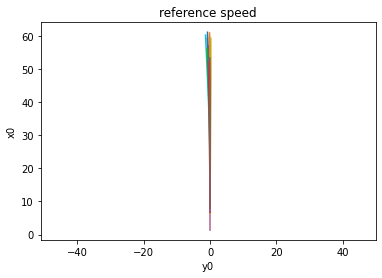

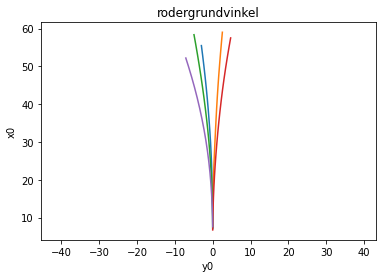

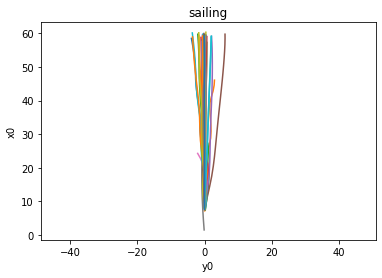

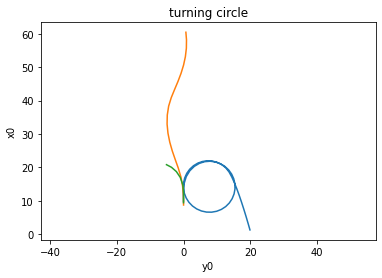

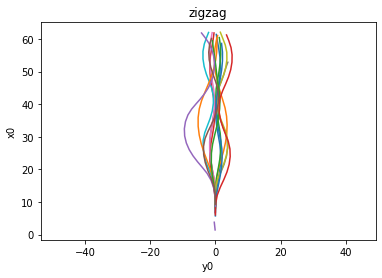

In [7]:
for test_type, group in df_runs.groupby(by=['test_type']):
    
    fig,ax=plt.subplots()
    ax.set_title(test_type)
    
    for id, row in group.iterrows():
        
        df = load_run(id=id)
        df = df.resample('3S').mean()        
        
        df.plot(x='y0', y='x0', ax=ax)
        
    ax.get_legend().set_visible(False)
    ax.axis('equal')
    ax.set_ylabel('x0')


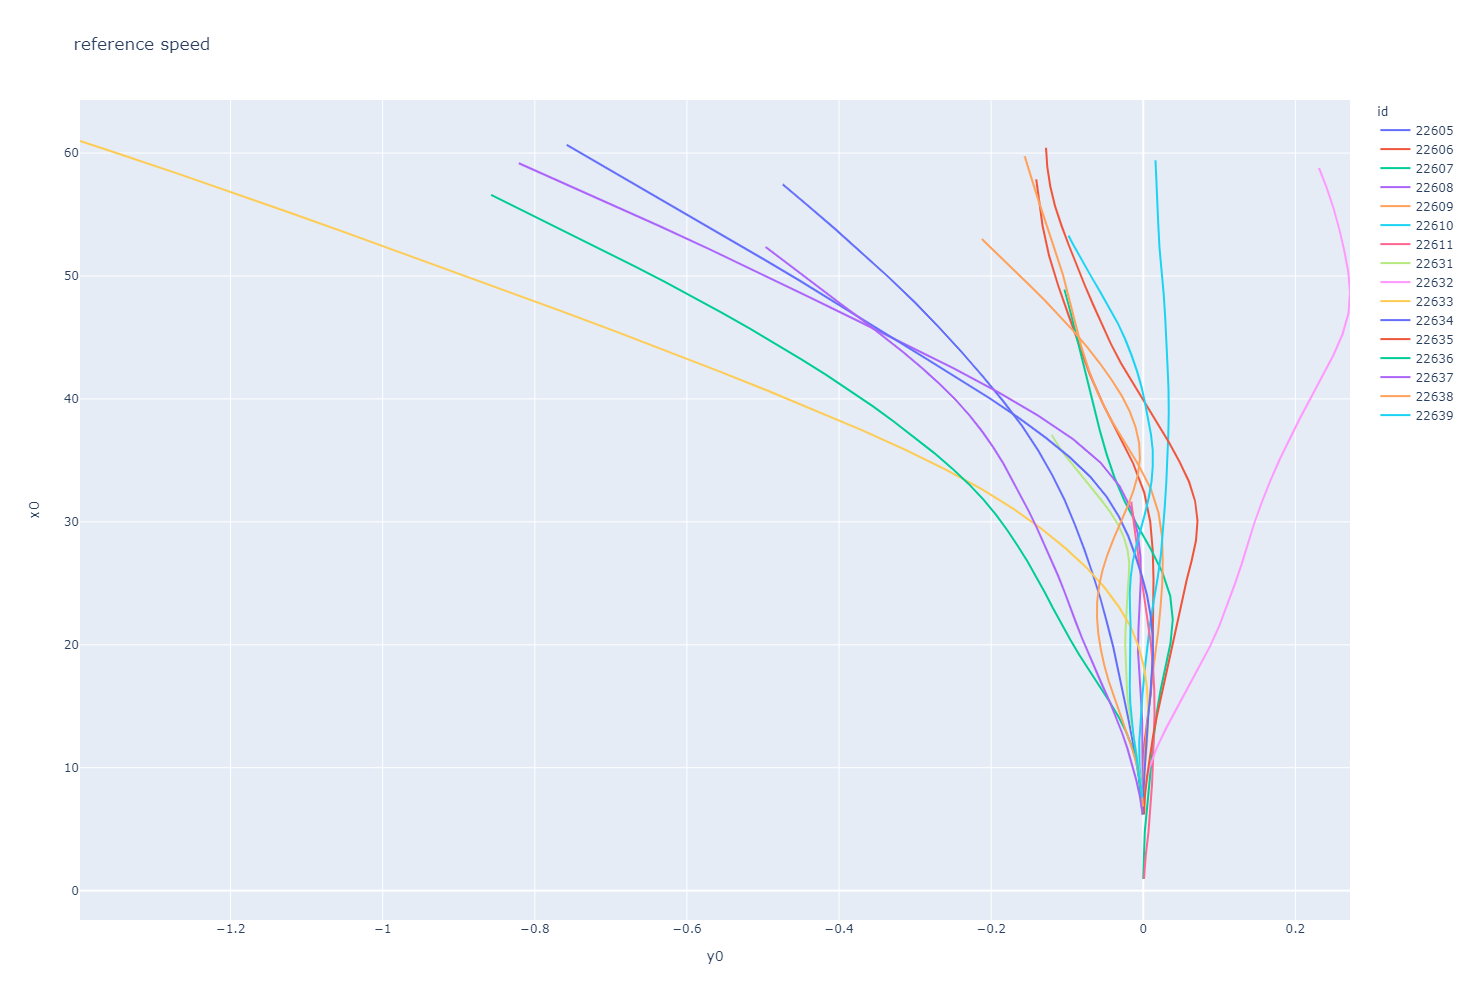

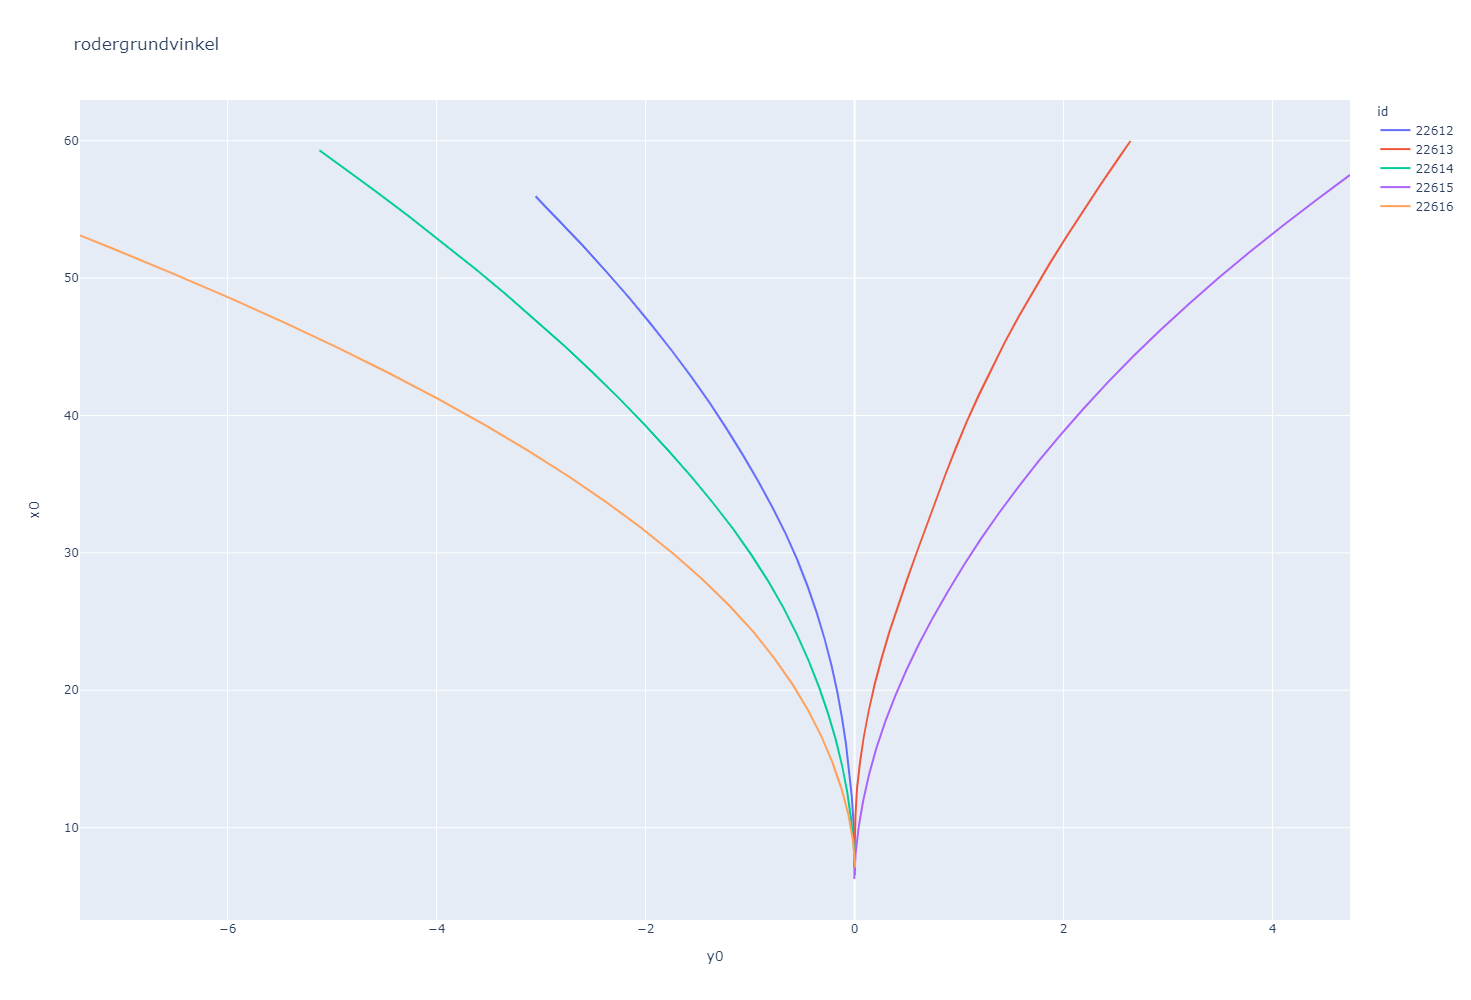

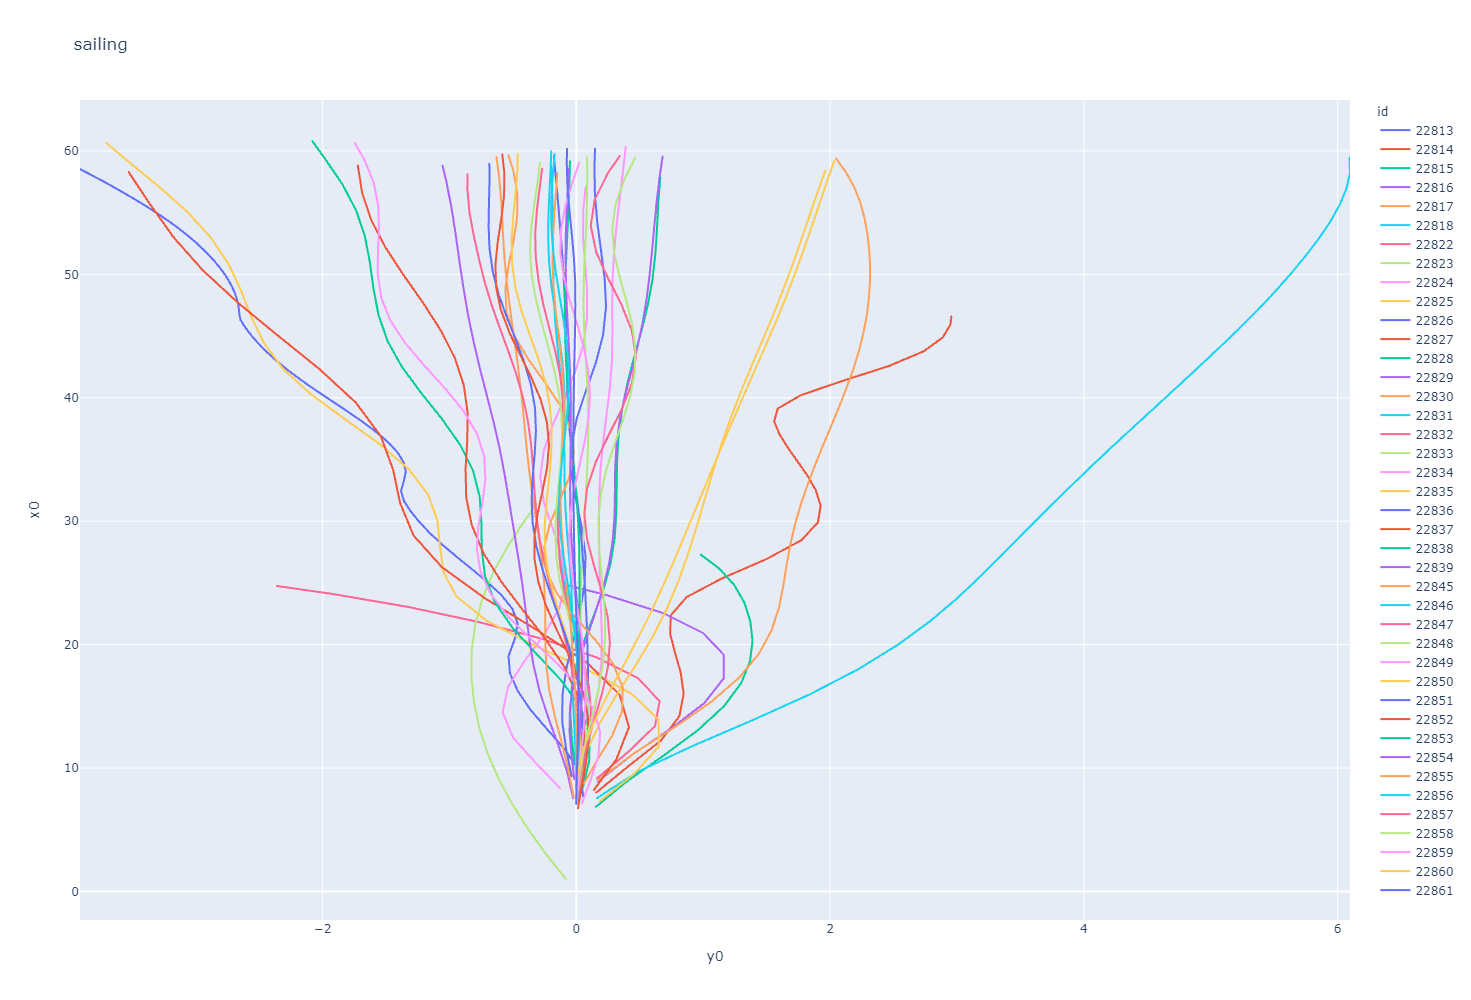

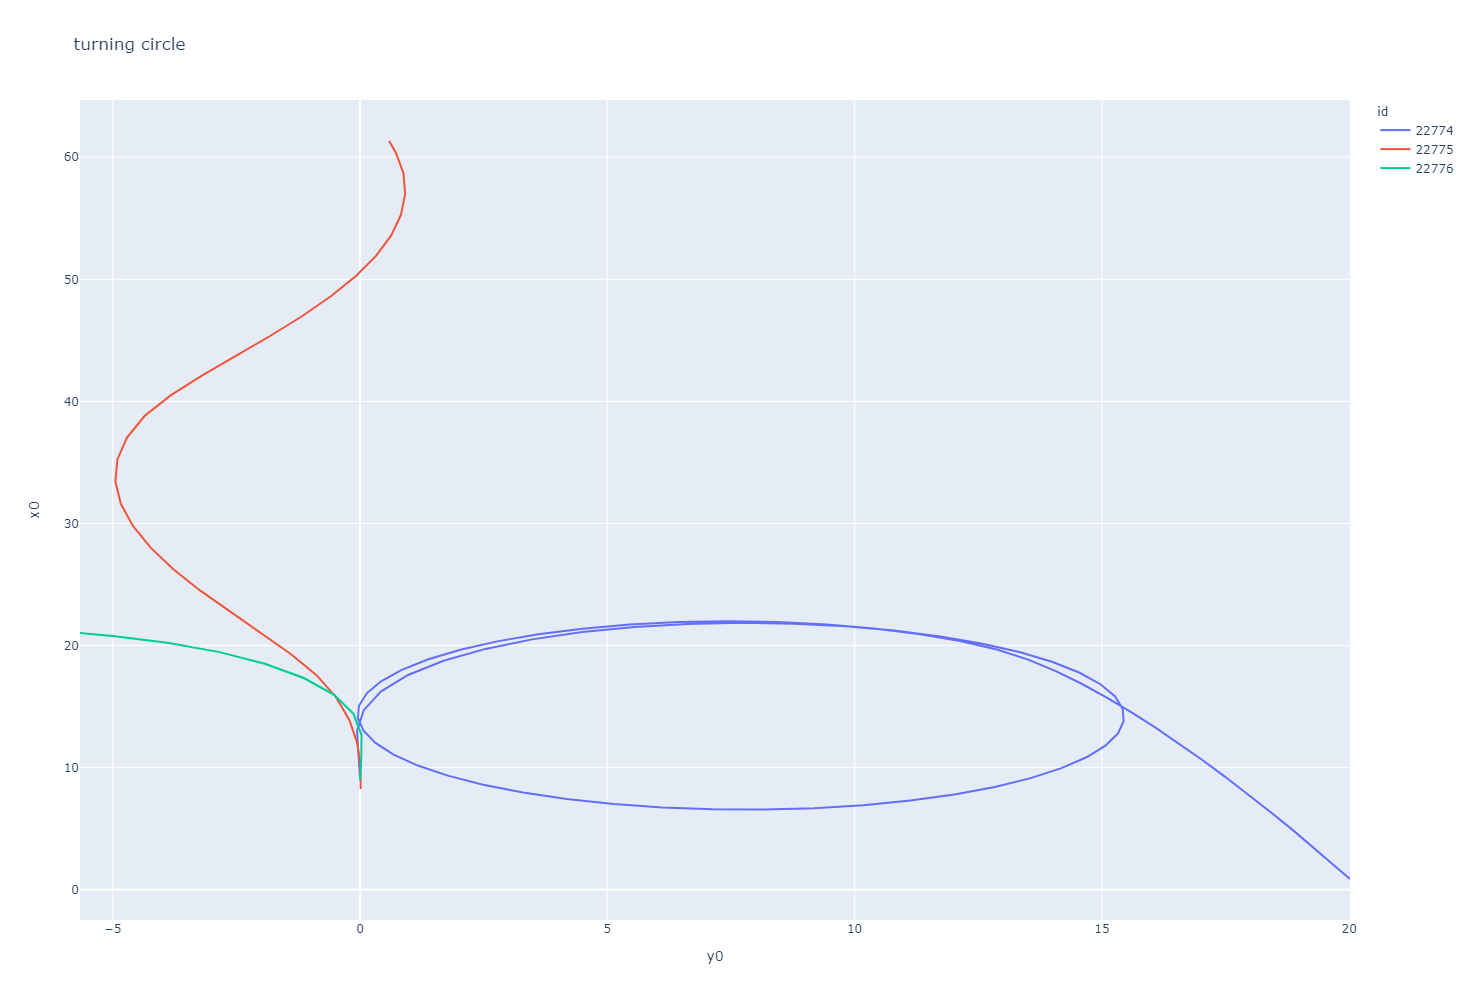

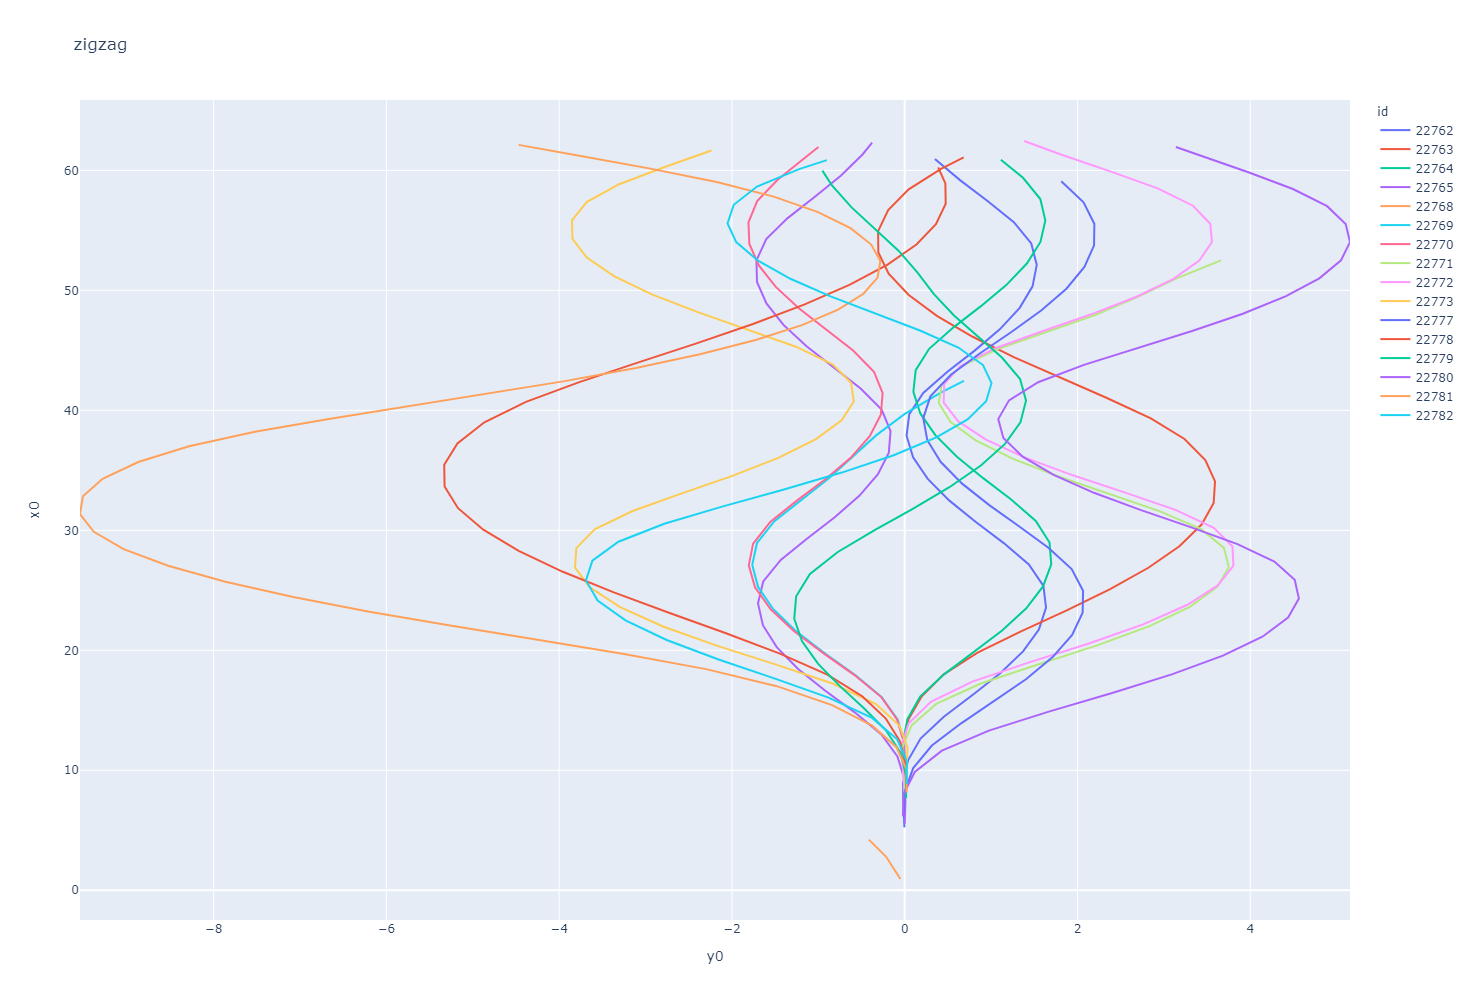

In [26]:
for test_type, group in df_runs.groupby(by=['test_type']):
    
    data = pd.DataFrame()
    
    for id, row in group.iterrows():
        
        df = load_run(id=id)
        df = df.resample('2S').mean()        
        df['id'] = id        
        data = data.append(df)
        
    display(px.line(data, x='y0', y='x0', width=1000, height=1000, line_group='id', color='id', title=test_type))